# Coursework 1: Data loading, visualisation and simple analysis using Python

In this coursework, we will deal with a dataset stored in the ".csv" format, which describes the housing price in Boston. This is a small dataset with only 506 cases. But it would be a good illustration how Python can be used for loading, visualising and analysing a dataset. The dataset was originally published at
\[1\] Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air, J. Environ. Economics & Management, vol.5, 81-102, 1978.

## Dataset
A copy of the .csv data is already here after you git clone this repository. The .csv format is a format for spreadsheet, which can be opened using Microsoft Excel or Libreoffice.

## Import libraries
The code importing the libraries is already provided, which includes
* pandas: a library for loading .csv datasets
* numpy: a library for manipulating numbers and arrays
* matplotlib: for data visualisation
* seaborn: for data visualisation as well
* sklearn: for linear regression and machine learing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 1. Load data and print the first few lines using pandas (10 points).

In [2]:
data=pd.read_csv('BostonHousing.csv')

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Dataset description
Each row is a case of the housing price. There are 506 cases in total. Each column is an attribute, there are 14 attributes, including:

**crim**: per capita crime rate by town

**zn**: proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**: proportion of non-retail business acres per town

**chas**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**nox**: nitric oxides concentration (parts per 10 million)

**rm**: average number of rooms per dwelling

**age**: proportion of owner-occupied units built prior to 1940

**dis**: weighted distances to five Boston employment centres

**rad**: index of accessibility to radial highways

**tax**: full-value property-tax rate per \$10,000

**ptratio**: pupil-teacher ratio by town

**b**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**lstat**: lower status of the population

**medv**: Median value of owner-occupied homes in $1000's

## 2. Simple statistics (10 points).
Print the basic statistics (mean and standard deviation) for the crime rate, nitric oxides concentration, pupil-teacher ratio and median value of owner-occupied homes.

In [5]:
#To get the basic statistics for all columns:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#To get basic statitistics for the specific columns:
variables={"crime rate":'crim', "nitric oxides concentration":'nox',"pupil teacher ratio":"ptratio","median value of owner-occupied homes":'medv'}

for x,y in variables.items():
    print("The {} mean is {} and the standard deviation is {}".format(x, round(np.mean(data[y]), 2), round(np.std(data[y]), 2)))



The crime rate mean is 3.61 and the standard deviation is 8.59
The nitric oxides concentration mean is 0.55 and the standard deviation is 0.12
The pupil teacher ratio mean is 18.46 and the standard deviation is 2.16
The median value of owner-occupied homes mean is 22.53 and the standard deviation is 9.19


## 3. Data visualisation (30 points).
### 3.1 Plot the histogram distribution for each data column (10 points).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a213c4050>,
      dtype=object)

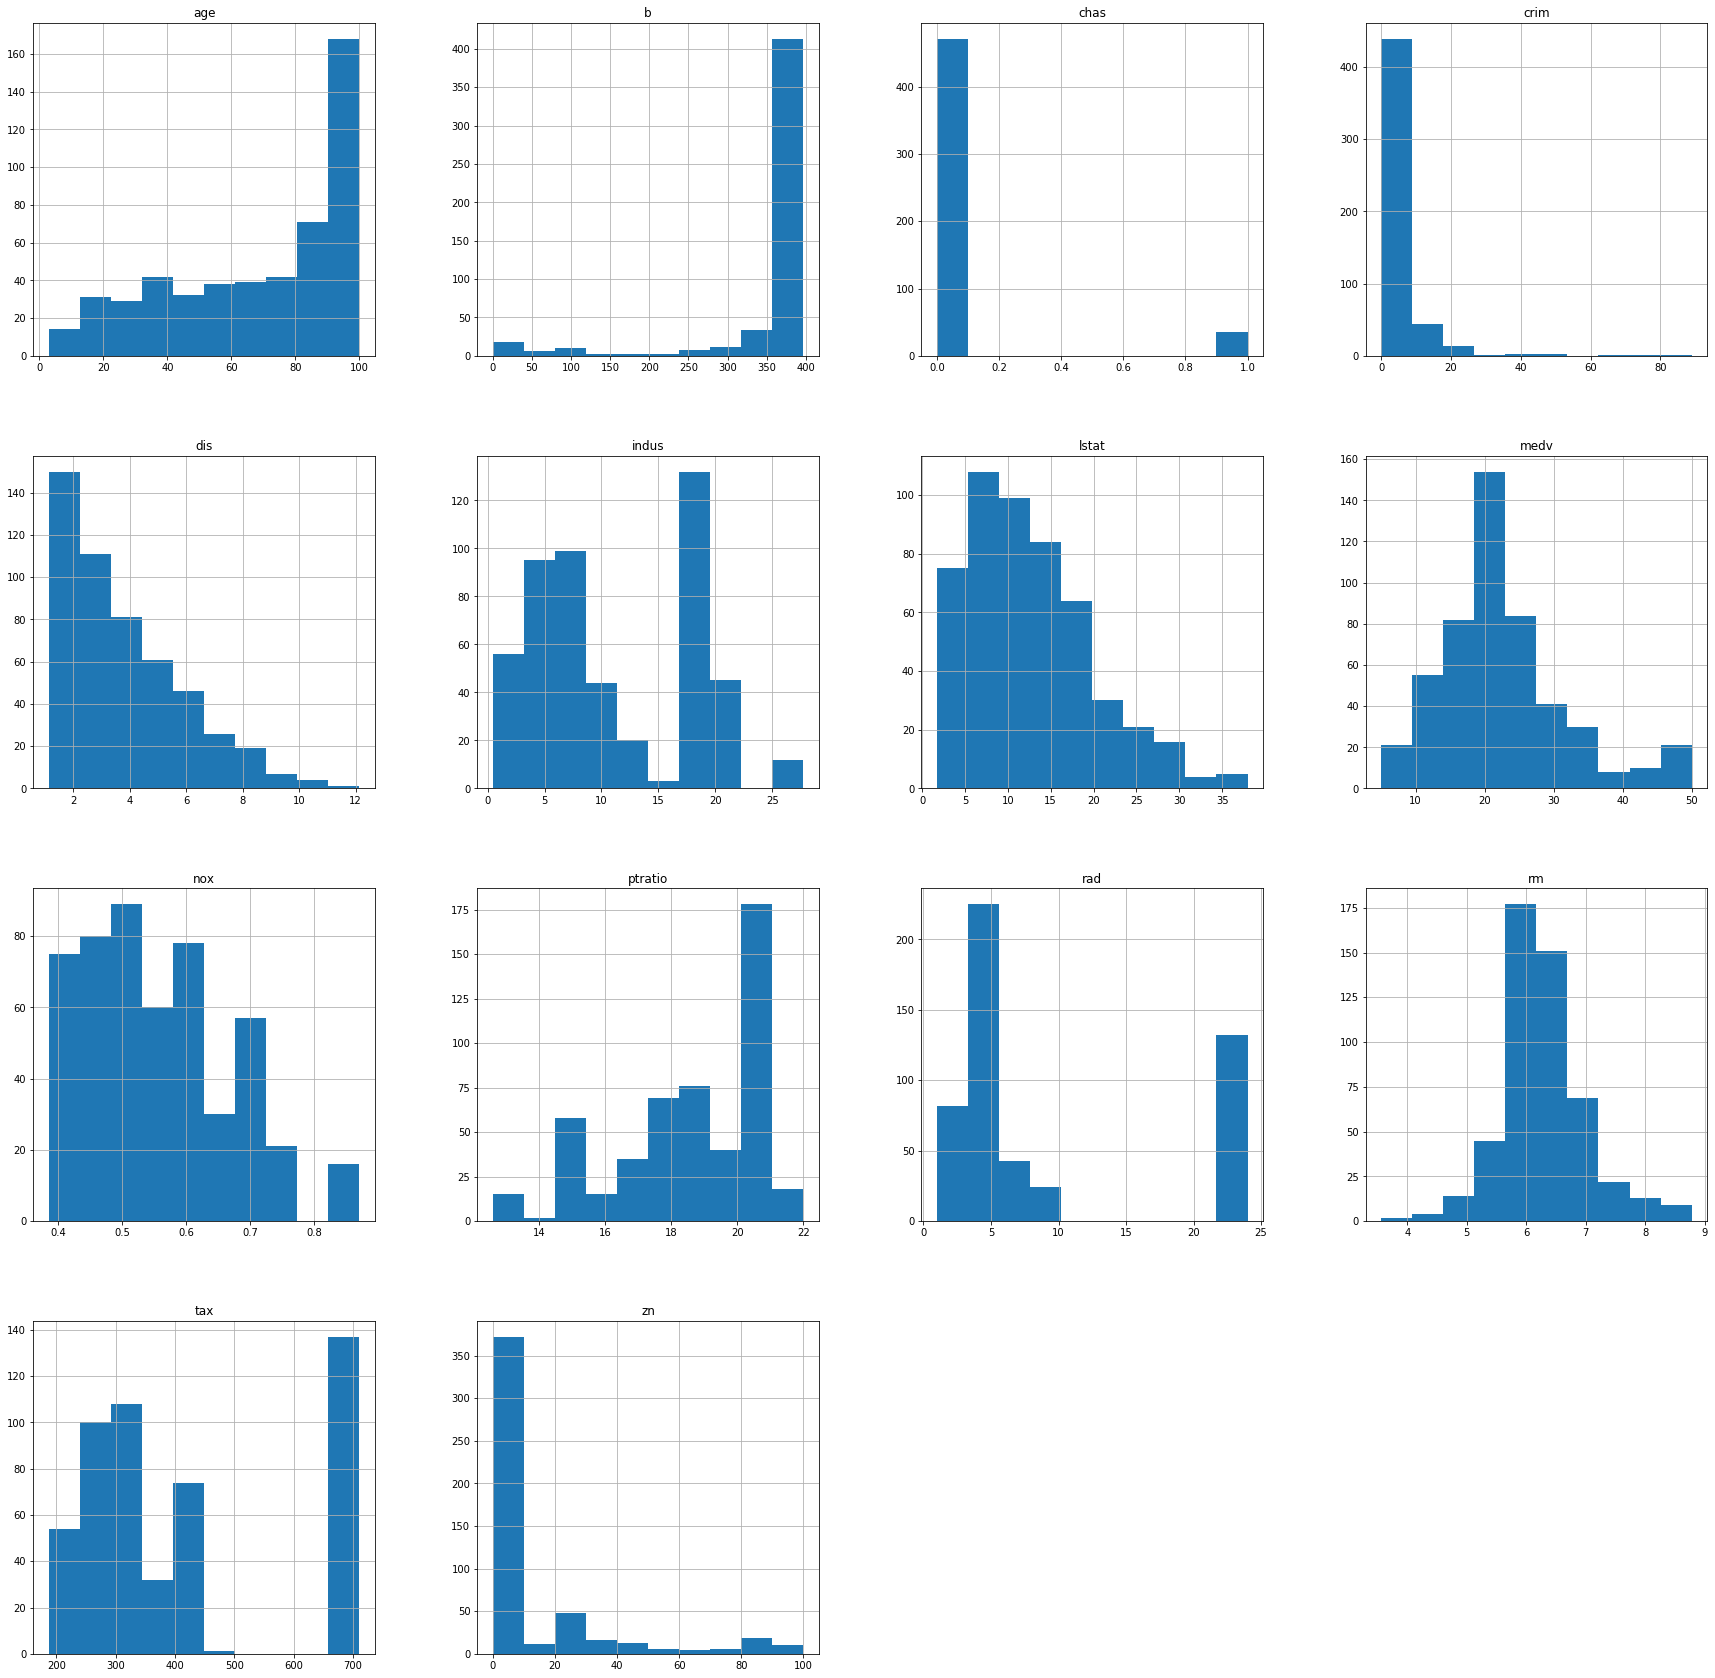

In [7]:
data.hist(figsize=(30,30))

### 3.2 Plot the correlation matrix between the data columns (10 points).

In [8]:
# Compute the correlation matrix
corr = data.corr()

[Text(0.5, 0, 'crim'),
 Text(1.5, 0, 'zn'),
 Text(2.5, 0, 'indus'),
 Text(3.5, 0, 'chas'),
 Text(4.5, 0, 'nox'),
 Text(5.5, 0, 'rm'),
 Text(6.5, 0, 'age'),
 Text(7.5, 0, 'dis'),
 Text(8.5, 0, 'rad'),
 Text(9.5, 0, 'tax'),
 Text(10.5, 0, 'ptratio'),
 Text(11.5, 0, 'b'),
 Text(12.5, 0, 'lstat'),
 Text(13.5, 0, 'medv')]

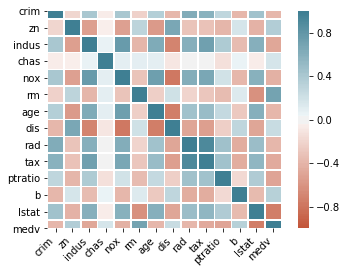

In [10]:
# Set up the matplotlib figure

ax=sns.heatmap(corr, vmax=1, vmin=-1,center=0,
            square=True, linewidths=.5, 
           cmap=sns.diverging_palette(20, 220, n=200)
            )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    )

### 3.3 Plot the house price (the last data column) against each feature (each of the first 13 data columns) (10 points).

In [21]:
cols=list(data.columns)

In [22]:
cols=cols[:12]

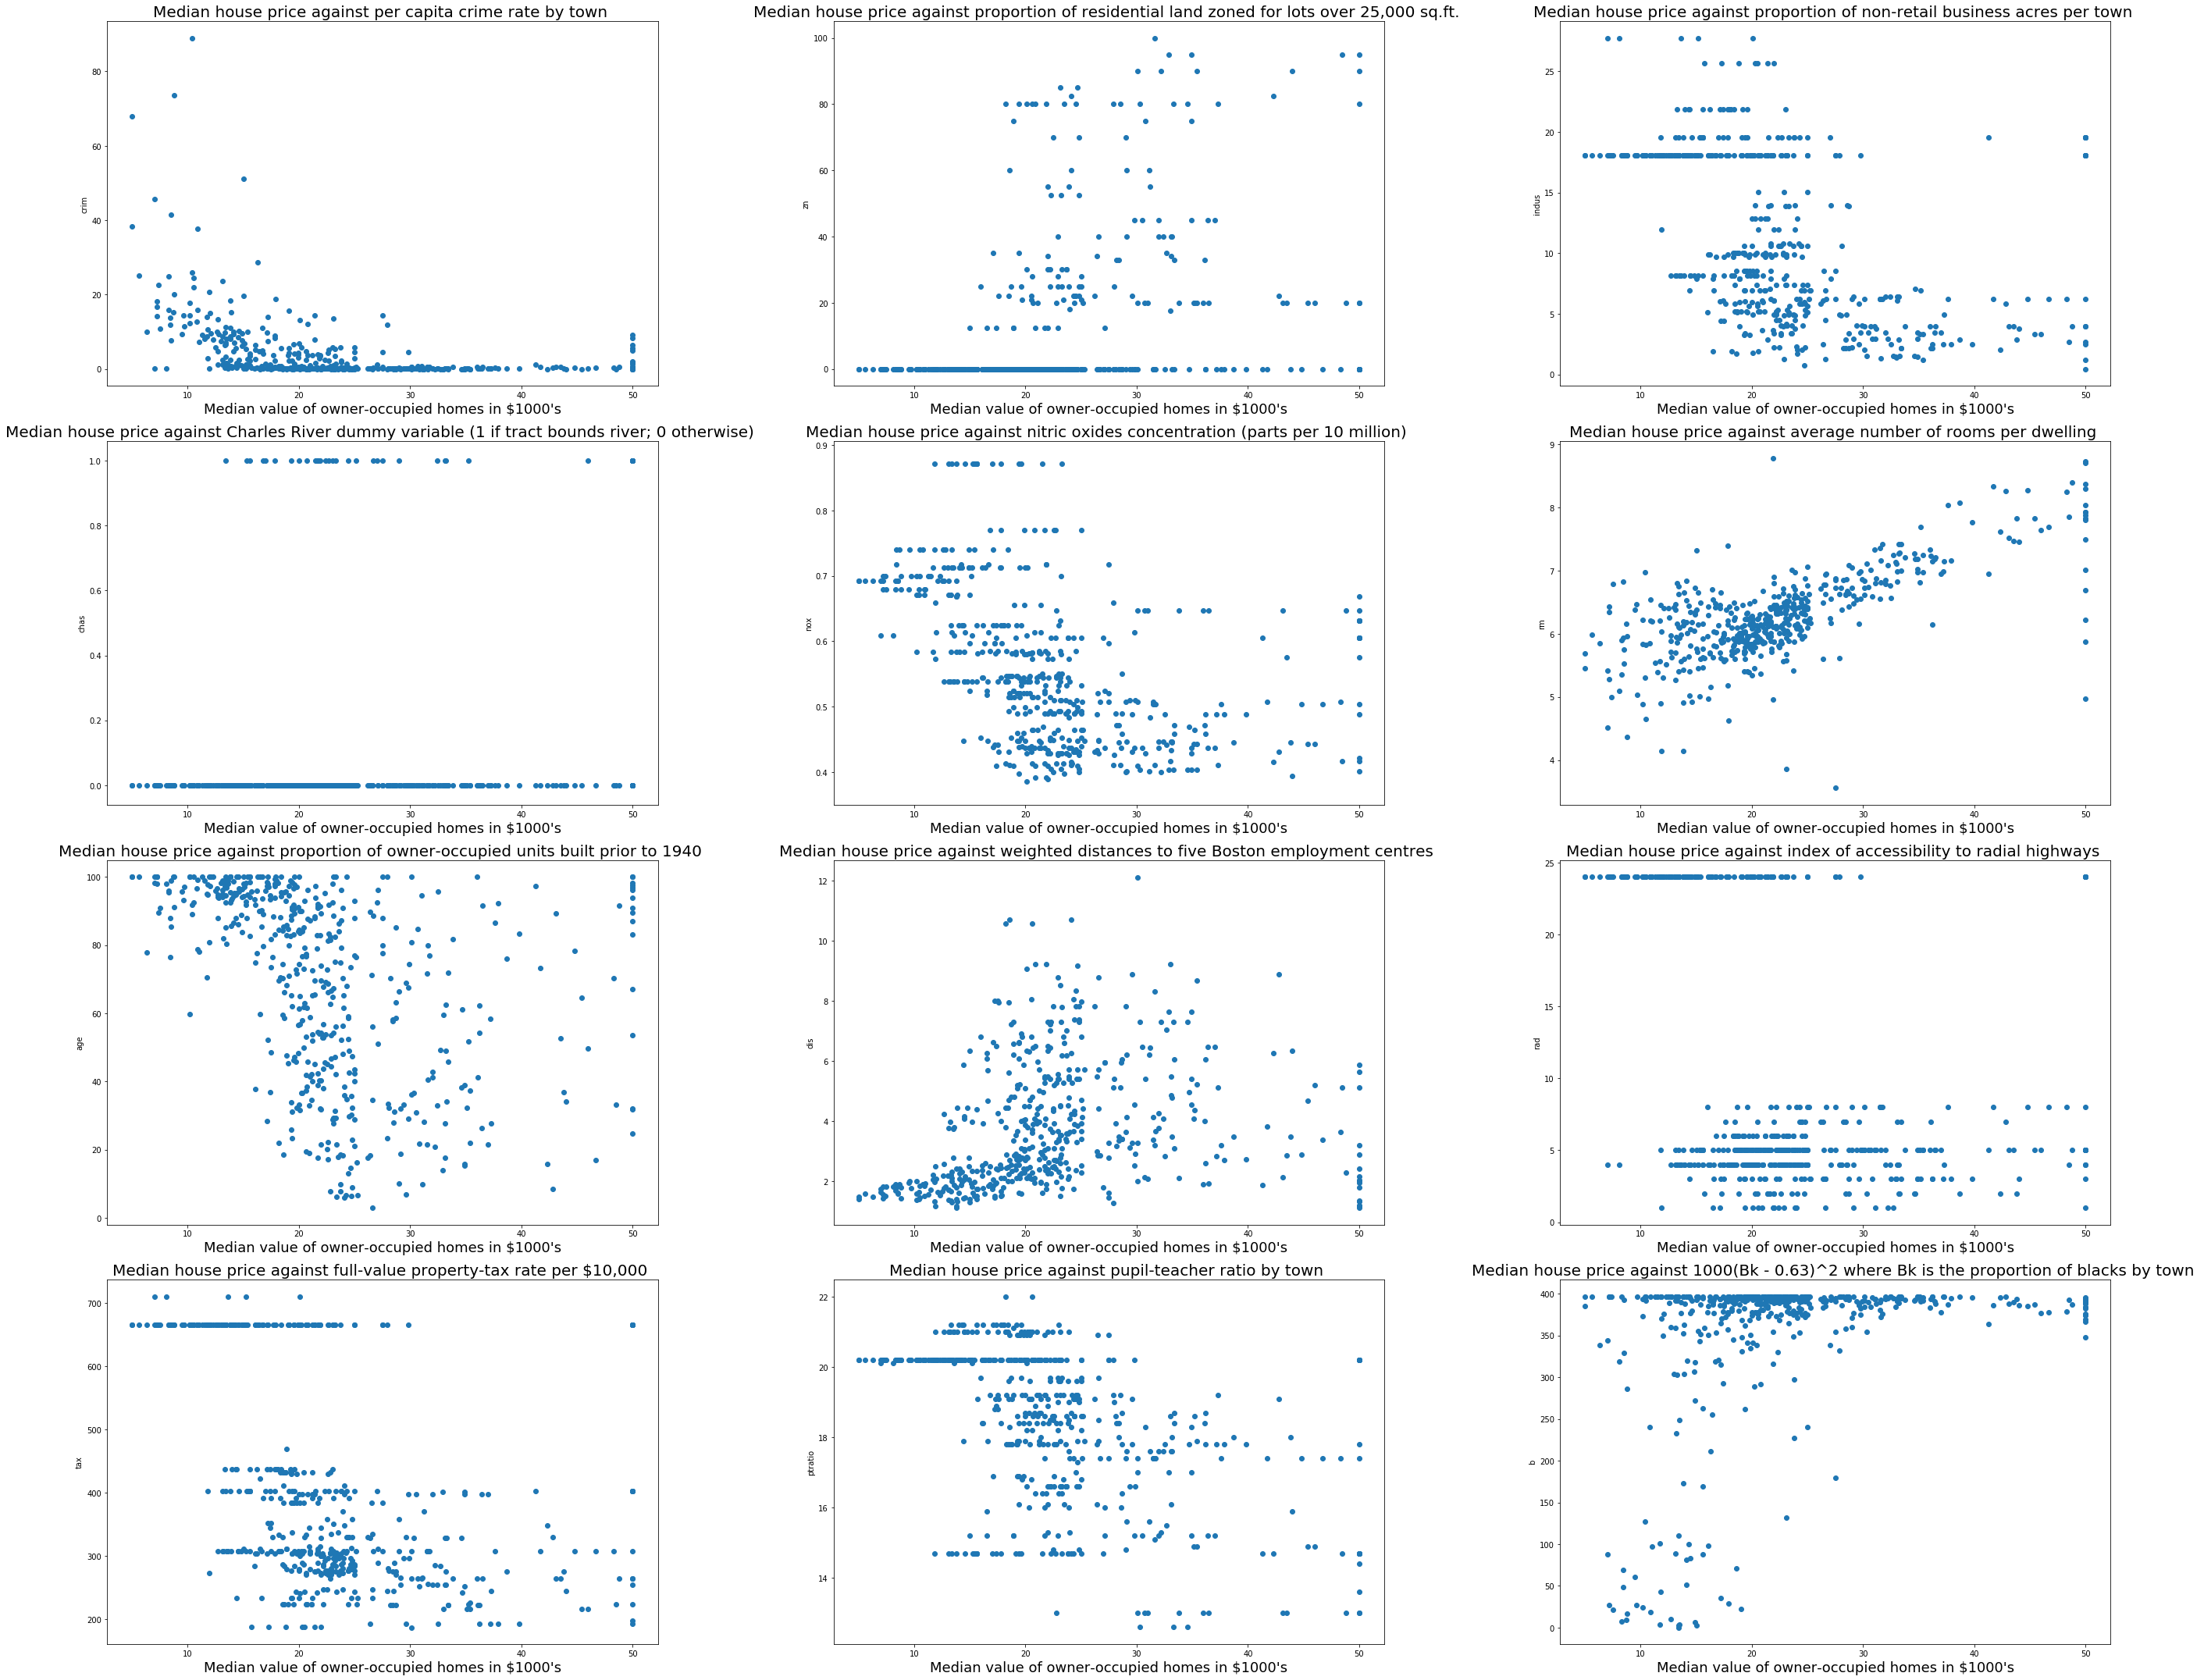

In [155]:
#new test
names=["per capita crime rate by town","proportion of residential land zoned for lots over 25,000 sq.ft.",

"proportion of non-retail business acres per town",

"Charles River dummy variable (1 if tract bounds river; 0 otherwise)",

"nitric oxides concentration (parts per 10 million)",

"average number of rooms per dwelling",

"proportion of owner-occupied units built prior to 1940",

"weighted distances to five Boston employment centres",

"index of accessibility to radial highways",

"full-value property-tax rate per $10,000",

"pupil-teacher ratio by town",

"1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town",

"lower status of the population"]



fig = plt.figure(figsize=(40,30))

for x, num, n in zip(cols, range(1, 13), range(len(names))):
    ax=fig.add_subplot(4, 3, num)
    plt.scatter(data['medv'], data[x])
    plt.subplots_adjust(bottom=0.1 , top=0.75, hspace=0.25)
    plt.xlabel("Median value of owner-occupied homes in $1000's", ha='center', fontsize=18)
    plt.ylabel(x)
    plt.title("Median house price against {} ".format(names[n]), fontsize=20)
    
plt.tight_layout()    
plt.show() 


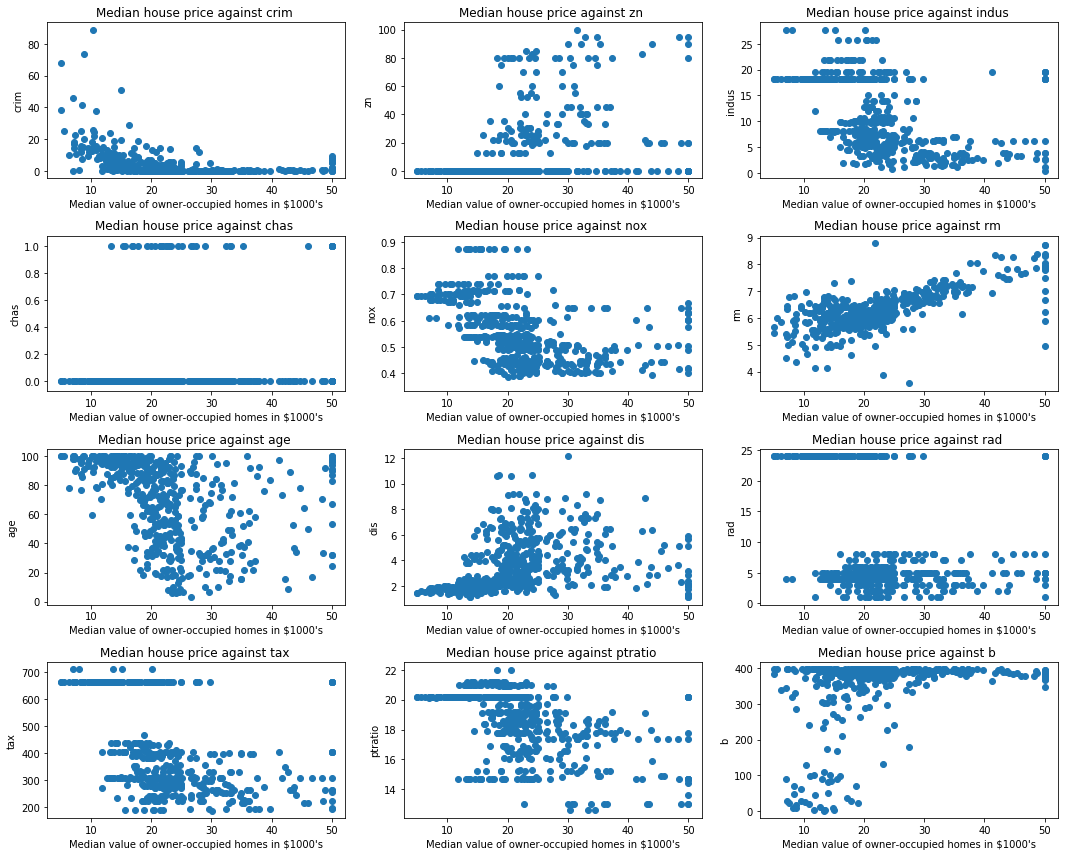

In [156]:

fig = plt.figure(figsize=(15,12))

for x, num in zip(cols, range(1, 13)):
    ax=fig.add_subplot(4, 3, num)
    plt.scatter(data['medv'], data[x])
    plt.subplots_adjust(bottom=0.1 , top=0.75, hspace=0.25)
    plt.xlabel("Median value of owner-occupied homes in $1000's", ha='center', fontsize=10)
    plt.ylabel(x)
    plt.title("Median house price against {} ".format(x), fontsize=12)
    
plt.tight_layout()    
plt.show()   


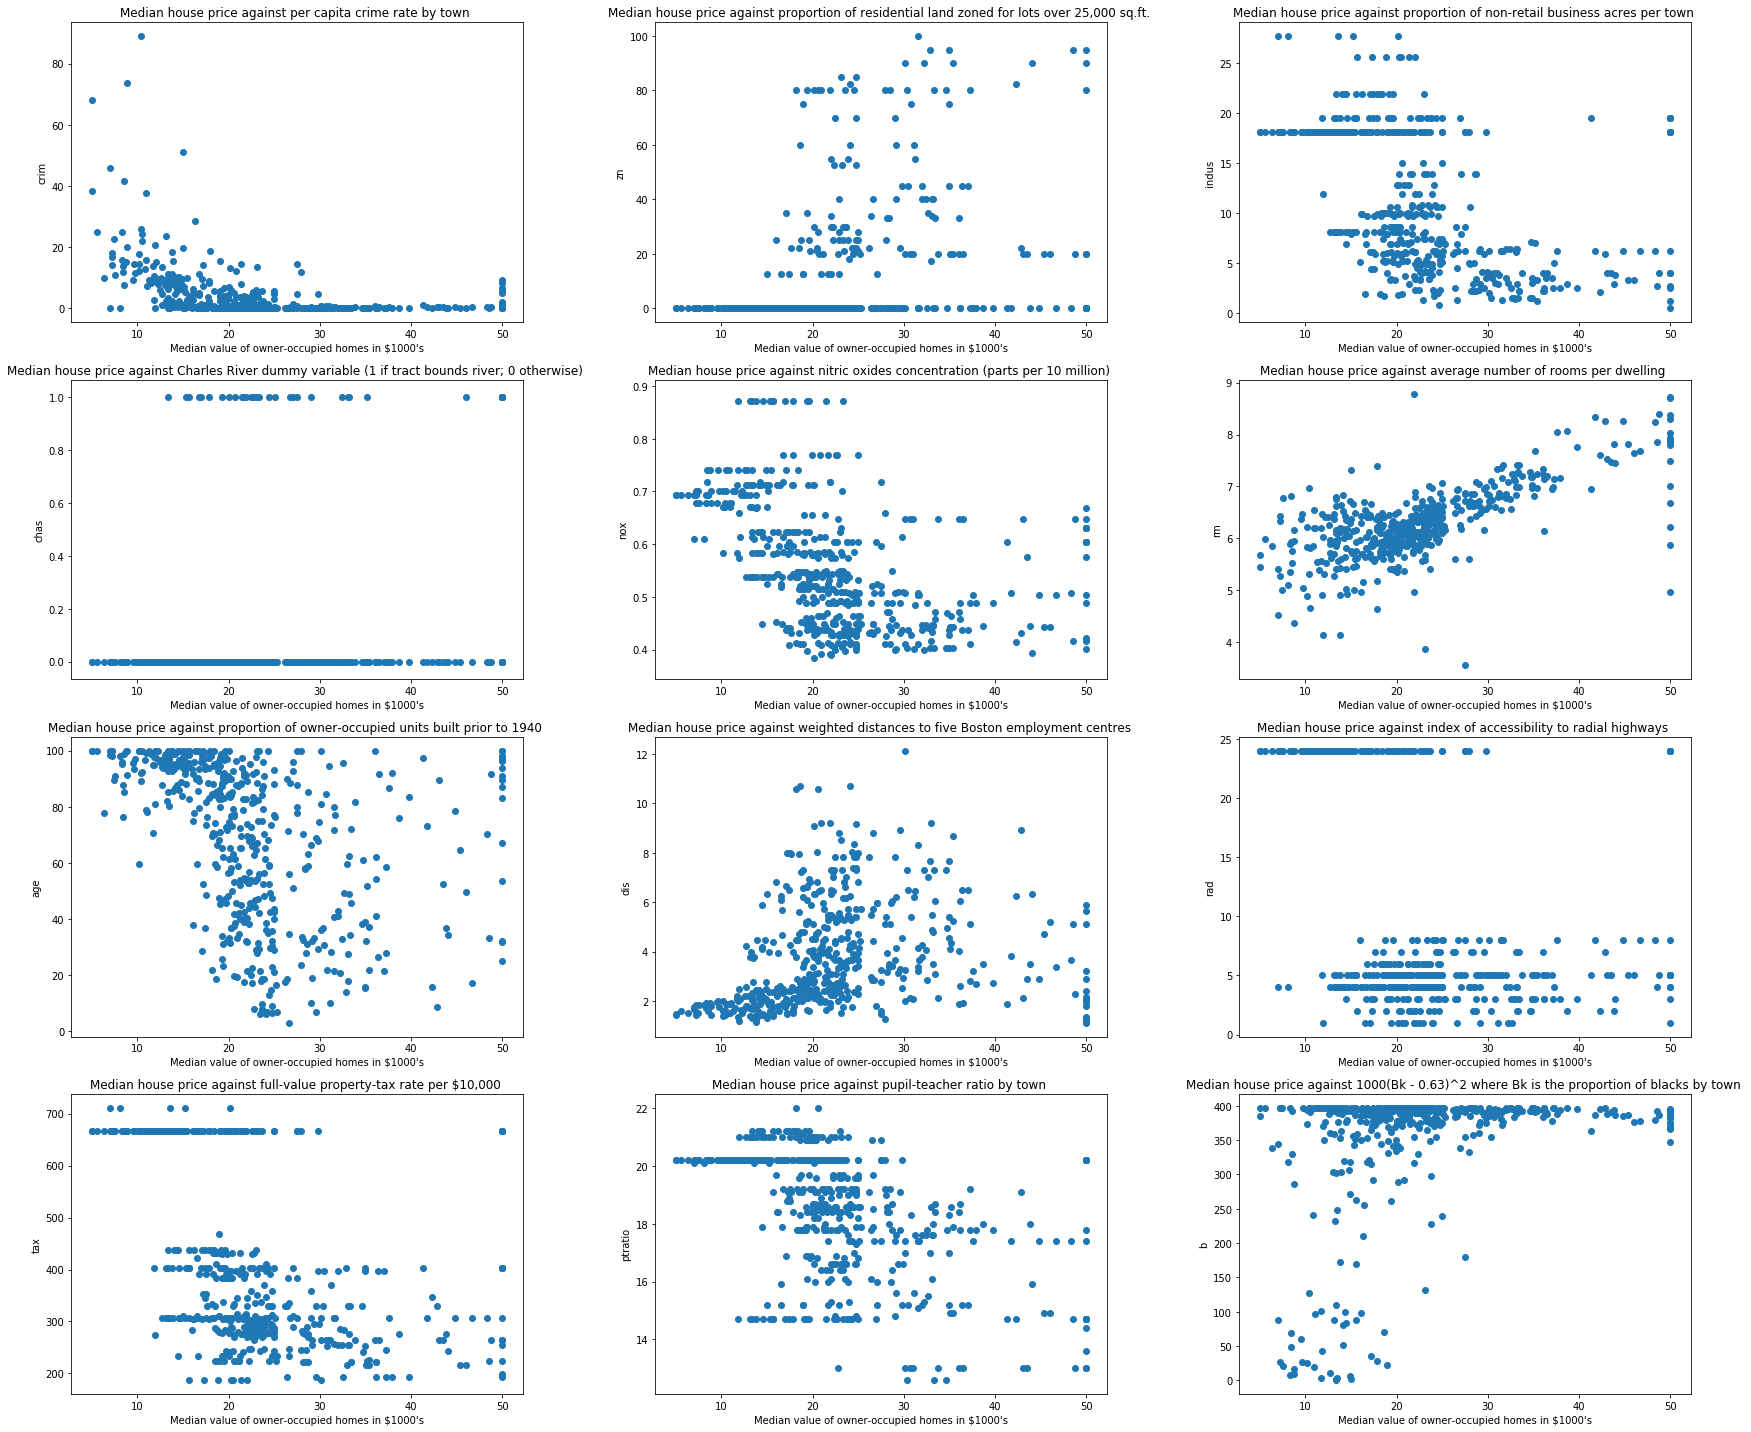

In [145]:
names=["per capita crime rate by town","proportion of residential land zoned for lots over 25,000 sq.ft.",

"proportion of non-retail business acres per town",

"Charles River dummy variable (1 if tract bounds river; 0 otherwise)",

"nitric oxides concentration (parts per 10 million)",

"average number of rooms per dwelling",

"proportion of owner-occupied units built prior to 1940",

"weighted distances to five Boston employment centres",

"index of accessibility to radial highways",

"full-value property-tax rate per $10,000",

"pupil-teacher ratio by town",

"1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town",

"lower status of the population"]





# for name,value  in names.items():
#     print("Median value of owner occupied homes against {} ".format(value))


fig = plt.figure(figsize=(25, 20))
fig.subplots_adjust(hspace=0.2)

for x,num,n in zip(cols, range(1, 13),range(len(names)) ):
    
    ax=fig.add_subplot(4, 3, num)
    plt.scatter(data['medv'], data[x])
    plt.subplots_adjust(bottom=0.1 , top=0.75, hspace=0.25)
    plt.xlabel("Median value of owner-occupied homes in $1000's", ha='center', fontsize=10)
    plt.title("Median house price against {} ".format(names[n]))
    plt.ylabel(x)
    
plt.tight_layout()    
plt.show() 
#

<Figure size 432x288 with 0 Axes>

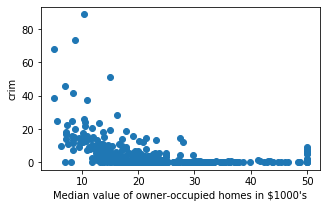

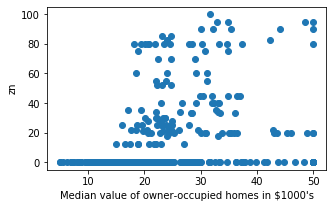

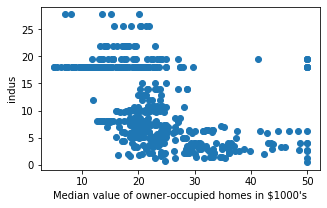

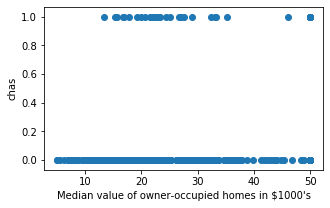

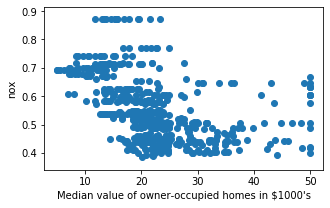

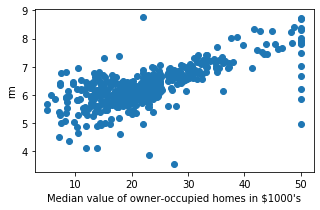

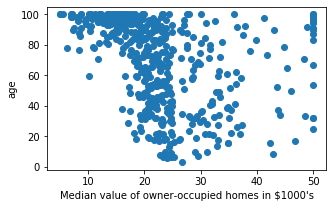

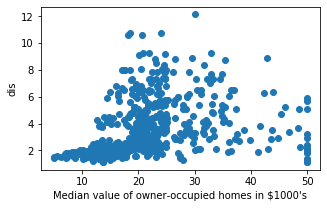

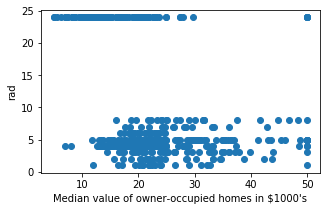

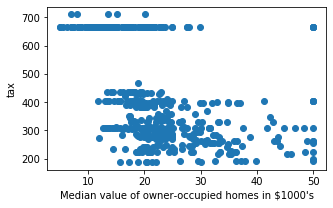

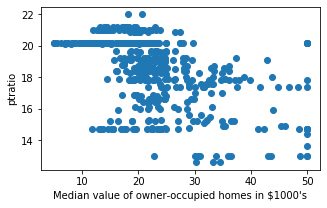

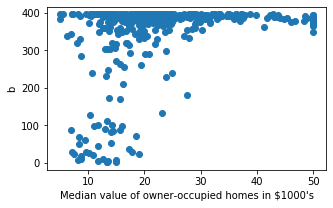

In [150]:
#Simple version
fig = plt.figure()

for i in cols :
    plt.subplots(figsize=(5, 3))
    plt.scatter(data['medv'], data[i])
    plt.ylabel(i)
    plt.xlabel("Median value of owner-occupied homes in $1000's", ha='center', fontsize=10)
   
   
plt.show()

## 4. Linear regression (30 points).
### 4.1. Regress the house price against all the features (15 points).

* First, split the whole dataset into a training set and a test set using a pre-defined ratio (80:20 in this case).

* Then, train the linear regression model using the training set.

* Finally, plot the predicted house price on the training set.

The dataset split is provided for consistent evaluation. Please do not change the random_state seed.

In [92]:
X = data.iloc[:, :13]
y = data.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [93]:
regressor=LinearRegression()

In [94]:
#train the algorithm:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
#get the intercept
print(regressor.intercept_)
#get the slope
print(regressor.coef_)

38.091694926302516
[-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]


In [96]:
#Then, get the predicted values of the model on the training set
y_pred = regressor.predict(X_train)

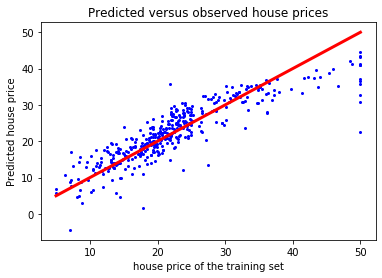

In [97]:
#plot the predicted house price on the training set versus the observed house values
plt.scatter(y_train, y_pred, color='blue', s=4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=3)
plt.title("Predicted versus observed house prices")
plt.xlabel('house price of the training set')
plt.ylabel('Predicted house price')
plt.show()

### 4.2 Quantitatively evaluate the linear model using the root of mean squared error (RMSE) and the R squared (R2) on both the training set and test set (15 points).

In [98]:
#RMSE for the test set 
rmse_ev_test=round(np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))), 3)
print('For the test set:')
print('Root mean square error is '+ str(rmse_ev_test))
#R squared (R2) for the test set 
rsquared_test=round(r2_score(y_test, regressor.predict(X_test)), 3)
print('R squared (R2) of the test set is '+ str(rsquared_test))


For the test set:
Root mean square error is 5.784
R squared (R2) of the test set is 0.589


In [99]:
#RMSE for the training set 
rmse_ev_tr=round(np.sqrt(mean_squared_error(y_train, regressor.predict(X_train))), 3)
print('for the train set')
print('Root mean square error is '+ str(rmse_ev_tr))
#R squared (R2) for the test set 
rsquared_tr=round(r2_score(y_train, regressor.predict(X_train)), 3)
print('R squared (R2) of the test set is '+ str(rsquared_tr))

for the train set
Root mean square error is 4.396
R squared (R2) of the test set is 0.773


## 5. Challenge yourself (20 points)

Previously, we use 13 features to predict the house price. Perhaps some of the features are more relevant to the price, whereas some are less.

### 5.1 Explore the features and develop a linear model for house price prediction using only 5 features as input (10 points).

Hint: either using feature selection or dimensionality reduction.

In [24]:
#Dimensionality reduction

#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

In [25]:
## 1- standardise the data ( this only works for numerical data) In this case all our variables are numerical, so we 
## can directly standardise all of our variables using StandardScaler.

In [100]:
#Normalise the features

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
pca_housing=PCA(n_components=5)
principal_components_housing=pca_housing.fit(X_train_scaled)
X_test_PCA=pca_housing.transform(X_test_scaled)
X_train_PCA=pca_housing.transform(X_train_scaled)


In [102]:
regressor_PCA=LinearRegression()

In [103]:
#train the algorithm:
regressor_PCA.fit(X_train_PCA, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
#get the intercept
print(regressor_PCA.intercept_)
#get the slope
print(regressor_PCA.coef_)

22.611881188118808
[-2.4629899   1.95254089  3.66013002 -0.57705985 -2.02273292]


In [105]:
#Then, get the predicted values of the model on the training set (like we did in q.4)
y_pred_PCA = regressor_PCA.predict(X_train_PCA)

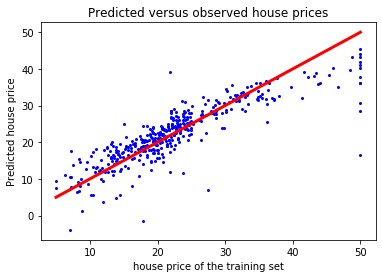

In [106]:
#plot the predicted house price on the postPCA training set versus the observed house values
plt.scatter(y_train, y_pred_PCA, color='blue', s=4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=3)
plt.title("Predicted versus observed house prices")
plt.xlabel('house price of the training set')
plt.ylabel('Predicted house price')
plt.show()

In [107]:
#Also get the predicted values of the model on the test set

y_pred_PCA_test=regressor_PCA.predict(X_test_PCA)

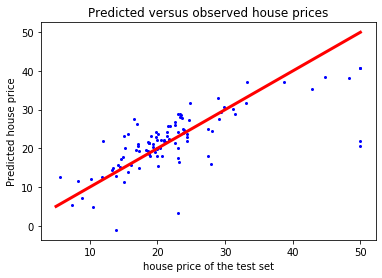

In [108]:
#plot the predicted house price on the post PCA test set versus the observed house values
plt.scatter(y_test, y_pred_PCA_test, color='blue', s=4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=3)
plt.title("Predicted versus observed house prices")
plt.xlabel('house price of the test set')
plt.ylabel('Predicted house price')
plt.show()

### 5.2 Evaluate the quantitative performance of the new model in terms of RMSE and R2 on the test set (10 points).

In [110]:
#RMSE for the PCA test set 
rmse_ev_test_PCA=round(np.sqrt(mean_squared_error(y_test, y_pred_PCA_test)), 3)
print('For the test set:')
print('Root mean square error is '+ str(rmse_ev_test_PCA))
#R squared (R2) for the test set 
rsquared_test_PCA=round(r2_score(y_test, y_pred_PCA_test), 3)
print('R squared (R2) of the test set is '+ str(rsquared_test_PCA))

For the test set:
Root mean square error is 6.319
R squared (R2) of the test set is 0.51


In [113]:
#RMSE for the PCA training set 
rmse_ev_train_PCA=round(np.sqrt(mean_squared_error(y_train, y_pred_PCA)),3)
print('For the train set:')
print('Root mean square error is '+ str(rmse_ev_train_PCA))
#R squared (R2) for the test set 
rsquared_train_PCA=round(r2_score(y_train, y_pred_PCA), 3)
print('R squared (R2) of the test set is '+ str(rsquared_train_PCA))

For the train set:
Root mean square error is 4.689
R squared (R2) of the test set is 0.742


#### So in conclusion, the dimensionality reduction using 5 features instead of 13 had a relatively low impact on the quantitatve performance of the regression model. The RMCE of the linear model for the test set pre-PCA with 5 compnonents was 5.784 and post-PCA was 6.319. The R2 values is also slightly worse after PCA. So the PCA made the model slightly worse, but both the RMCE and the R2 values are very similar despite reducing the number of features by more than half. 
